# Rank envelope tests

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
import zerosSpectrogram

//anaconda/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
//anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This notebook presents some aspects of rank envelope tests as discussed in the paper. 
We start with an example to illustrate the methodology of rank envelope tests. 
Then we assess tests power for several experimental conditions.

## Rank envelope tests: an example

We start by generating a chirp signal corrupted by white Gaussian noise.
Two control parameters here:
- `duration` of the signal
- `SNR` the signal-to-noise ratio

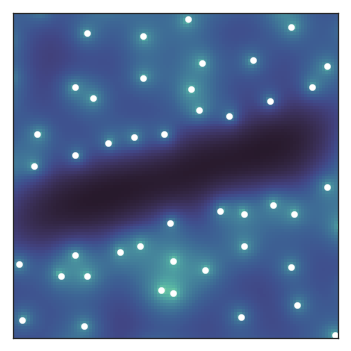

In [2]:
base = 128 # length of the simulation
duration = base # chirp will fill the observed area
SNR = 20
Sww, pos_exp, stft, chirp = zerosSpectrogram.experiments.demoSpectrogramSignal(SNR, duration, viz=True)

We see that the point pattern formed by the zeros is modified by the presence of the signal. 
Using a test statistic, are we able to tell whether the point process formed by the zeros above differ significantly from a point process formed by the zeros of the spectrogram of white noise? 

We need first to simulate, in the same experimental conditions, a number `run_MC` of point patterns deduced from the zeros of spectrogram of **white noise only**.

For each point process, one then computes:
1. the spatial statistic of the point process, here $r \mapsto L(r)$
2. compute the $T$-statistic, either $T_2$ or $T_\infty$ by comparing the spatial statistic of the point process to its theoretical value (or to a pointwise average if not available in closed form).

For this example we use the theoretical value of the statistic $r \mapsto L(r)$

In [3]:
np.random.seed(0)
run_MC = 199 # number of Monte Carlo realizations

radius = np.linspace(0, .5*(base)/np.sqrt(2*base))  # specify radius at which one evaluates the function

tinfty = np.zeros((run_MC, len(radius)))
t2 = np.zeros_like(tinfty)

for i in range(run_MC):
    
    pos = zerosSpectrogram.experiments.demoSpectrogramSignal(0, duration)
    __, L = zerosSpectrogram.spatialstats.LFromRSpecRadius(pos, radius)
    
    t2_ind, tinfty_ind = zerosSpectrogram.spatialstats.computeTStatistics(radius, L[2]) #L[2] uses isotropic correction
    
    t2[i, :] = t2_ind
    tinfty[i, :] = tinfty_ind

Then, pick a significance level $\alpha$. Symmetry considerations ensure that the testing procedure has significance level $\alpha/(m +1)$, where $m$ is the number of independent realizations of the null hypothesis corresponding to white noise only.

We compute the test statistics $t_2^{\mathrm{exp}}$ and $t_\infty^{\mathrm{exp}}$ for the case where the signal is present.
We sort by decreasing order the $m$ test $t_i$ statistics obtained for the null hypothesis.
The null hypothesis is rejected if and only $t^{\mathrm{exp}} > t_k$.

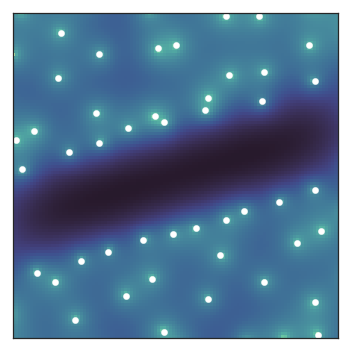

In [4]:
np.random.seed(2)
alpha = 0.05 # significance level
k = int(np.floor(alpha*(run_MC+1))) # corresponding k value

SNRdB = 20
SNR = 10**(SNRdB/10)
# compute experiment
Sww, pos_exp, stft, chirp = zerosSpectrogram.experiments.demoSpectrogramSignal(SNR, duration, viz=True)

# compute L and t statistic
__, L = zerosSpectrogram.spatialstats.LFromRSpecRadius(pos_exp, radius)
t2_exp, tinfty_exp = zerosSpectrogram.spatialstats.computeTStatistics(radius, L[2])

# sort values of t for null hypothesis
t2 = np.sort(t2, axis=0)[::-1, :]
tinfty = np.sort(tinfty, axis=0)[::-1, :]

Since test statistics depend on the radius $r$, we can plot their evolution with respect to $r$ to illustrate at which scale the signal test statistic starts to depart from the null hypothesis test statistic.

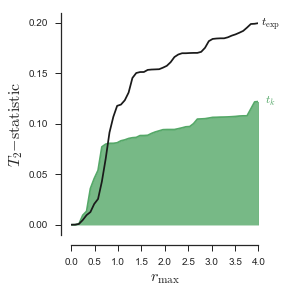

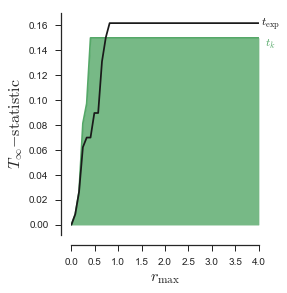

In [5]:
zerosSpectrogram.utils.plotRankEnvRes(radius, k, t2, tinfty, t2_exp, tinfty_exp)

## Assessing the power of the test

The significance $\alpha$ of the test is fixed by the user. We keep $\alpha = 0.05$.
Now it remains to investigate the power $\beta$ of the test, that is the probability of rejecting the null hypothesis when one should. 

We consider the task of detecting a linear chirp as above. We vary SNR and chirp duration and explore how it influences the power of the test. 

We keep m = 199. Thus k = 10, so that $\alpha = 0.05$. 
To estimate $\beta$, repeat 200 times:
1. simulate a linear chirp plus noise and simulate $m$ white noise spectrograms
2. compute estimates of corresponding spatial statistics
3. compute test statistics 
4. check wether H0 is rejected for each value of rmax.

For a given choice of SNR and duration this simulations takes approximately 2 hours on a 2016 MacBookPro.
Figure below uses stored data files of size 300Mb each which can not be uploaded on GitHub. If you are interested in these files, please contact directly the authors.

**Available simulations**

Amplitude parameter (SNR = amplitude^2/2)
- amplitude = 1 (SNR = .5)
- amplitude = 5 (SNR = 12.5)
- amplitude = 10 (SNR = 50)

Duration parameter: either 1 (full spread) or 0.5 (half spread)


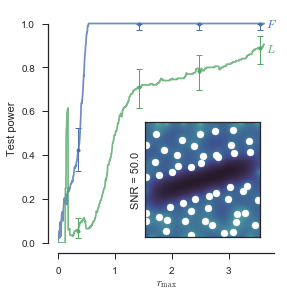

In [6]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(10, 1, inset_pos=[0.5, 0.2, 0.4, 0.4 ])

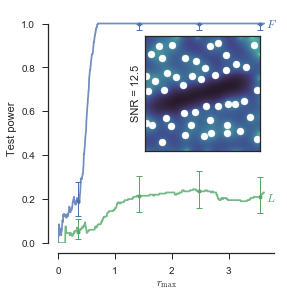

In [7]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(5, 1)

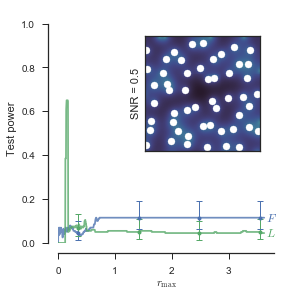

In [8]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(1, 1)

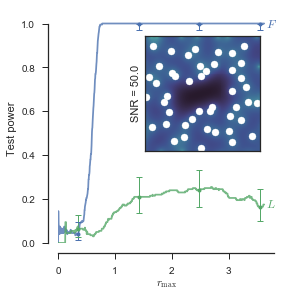

In [9]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(10, .5)

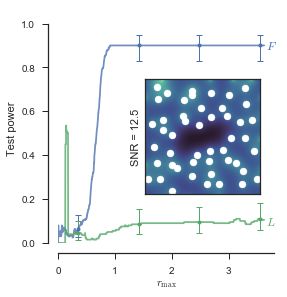

In [10]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(5, .5, inset_pos=[0.5, 0.35, 0.4, 0.4 ])

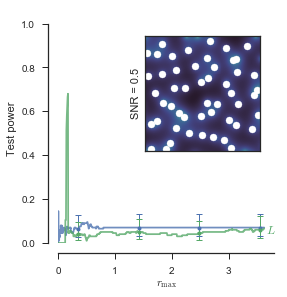

In [11]:
zerosSpectrogram.experiments.rankEnvelopePowerSNR(1, .5)